# Looking at westbound traffic on Interstate 94
## Between Minneapolis and St. Paul, Minnesota

This project will explore conditions that may impact traffic on [Interstate 94](https://en.wikipedia.org/wiki/Interstate_94), specifically a westbound stretch between Minneapolis and St. Paul. It will look at various weather and time patterns to determine what may indicate heavy traffic.

#### The I-94 Dataset

John Hogue, founder of Social Data Science, prepared the dataset and shared it through the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). The data was sourced from the Minnesota Department of Transportation, and it was collected via the department's automatic traffic recorders at station 301. This station is located approximately midway between the two cities.

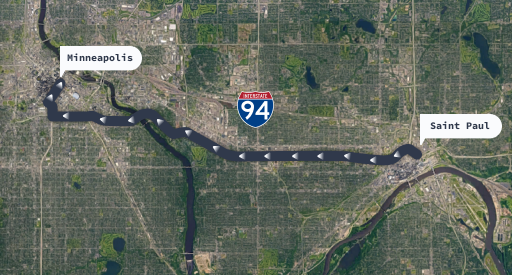

#### Data Dictionary
| Column | Description |
|--------|-------------|
| holiday | Categorical US National holidays plus regional holiday, Minnesota State Fair |
| temp | Numeric Average temp in kelvin |
| rain_1h | Numeric Amount in mm of rain that occurred in the hour |
| snow_1h | Numeric Amount in mm of snow that occurred in the hour |
| clouds_all | Numeric Percentage of cloud cover |
| weather_main | Categorical Short textual description of the current weather |
| weather_description | Categorical Longer textual description of the current weather |
| date_time | DateTime Hour of the data collected in local CST time |
| traffic_volume | Numeric Hourly I-94 ATR 301 reported westbound traffic volume |

In [80]:
# import useful and necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# inline magic for functional matplotlib in Jupyter
%matplotlib inline

# read dataset, print info
traffic_volume = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [81]:
# A look at the head and tail of the dataset
traffic_volume

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


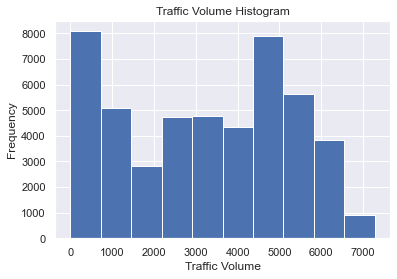

In [82]:
# plotting traffic_volume column using pandas hist
traffic_volume['traffic_volume'].plot.hist()
plt.title('Traffic Volume Histogram')
plt.xlabel('Traffic Volume')
plt.show()

In [83]:
# using series.describe() to see statistics of traffic_volume column
traffic_volume['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Early Observations

The traffic volume seems to reach its highest peaks at low frequency, the lowest in the data set. In our dataset, traffic volume peaks in a range of ~6,200 to ~7,200 vehicles per hour. The highest volume frequencies are low traffic volumes, 0 to ~750 or ~1,250 vehicles per hour, and high-mid volumes, ~5,000 vehicles per hour. 

The low-volume occurrences likely correspond to evening hours, and the mid-high volumes likely correspond to rush hours. The average volume is ~3,200 vehicles per hour. About 25% of the time, traffic is ~1,200 vehicles or less. Another 25% of the time, traffic is ~4 times that at ~5,000 vehicles.

It is likely the overnight hours, times when there is less likely to be heavy traffic anyways, are significantly impacting the frequencies. Below, the dataset will be separated into two subsets:
* Day Hours: 7 a.m. to 6:59 p.m. or 0700 to 18:59.
* Night Hours: 7 p.m. to 6:59 a.m. or 1900 to 06:59.

In [84]:
# Traffic Volume: Day vs. Night
# transforming date_time column using pd.to_datetime() function
traffic_volume['date_time'] = pd.to_datetime(traffic_volume['date_time'])

# isolate data by night and day; series.dt.hour method used
# day: 0700 to less than 1900 hours
# night 1900 to less than 0700
day_traffic = traffic_volume.copy()[(traffic_volume['date_time'].dt.hour >= 7) & (traffic_volume['date_time'].dt.hour < 19)]
night_traffic = traffic_volume.copy()[(traffic_volume['date_time'].dt.hour >= 19) | (traffic_volume['date_time'].dt.hour < 7)]


In [85]:
print('First five and last five rows of the day_traffic subset:')
print(day_traffic.head())
print(day_traffic.tail())
print('\n')
print('Day Traffic traffic_volume column described:')
print(day_traffic['traffic_volume'].describe())
print('\n')
print('First five and last five rows of the day_traffic subset:')
print(night_traffic.head())
print(night_traffic.tail())
print('\n')
print('Night Traffic traffic_volume column described:')
print(night_traffic['traffic_volume'].describe())


First five and last five rows of the day_traffic subset:
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
48194    None  283.84     0.00      0.0          75         Rain   
48195    None  283.84     0.00      0.0          75      Drizz

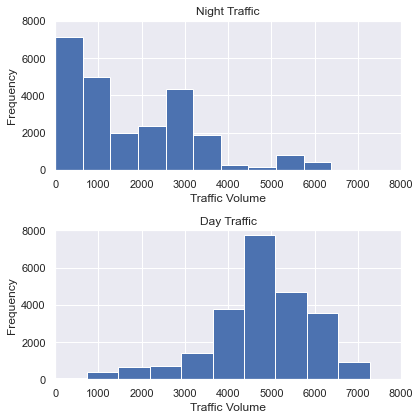

In [86]:
# Plotting histograms for each sub dataset
sns.set_theme()
plt.figure(layout='tight', figsize=(6,6))
plt.subplot(2, 1, 1)
plt.hist(night_traffic['traffic_volume'])
plt.title('Night Traffic')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000)
plt.xlim(0,8000)
plt.subplot(2, 1, 2)
plt.hist(day_traffic['traffic_volume'])
plt.title('Day Traffic')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000)
plt.xlim(0,8000)
plt.show()

## Day vs. night traffic volume:
### Brief observations about traffic volume

#### Day Traffic
The histogram shows a relatively normal distribution with a slight left skew for the daytime traffic, 7 a.m. to 6:59 p.m. or 18:59 hours. Mid to high traffic volumes are much more prevalent during the daytime. On average, 4,762 vehicles pass by the station during the daytime hours. Rarely is there low traffic, but the traffic volume does peak to higher levels with some degree of frequency.

#### Night Traffic
The night traffic, 7 p.m. or 19:00 hours to 6:59 a.m., is right-skewed. Most of the values fall in the frequency range to the right, nearer the y-axis origin. Traffic volume during the night tends to be sparse. The average traffic volume is 1,785 vehicles passing the station in any given nighttime hour. Though there are times of high traffic volume, low traffic volume is so much more prevalent during the night hours.

#### Should night traffic data still be used?
Given the low frequency of high traffic volume during the nighttime hours, it may be beneficial to use this data to see what factors affect traffic volume. And it may be easier to seek out those indicators for comparison to daytime hours.

In [87]:
# Traffic volume by month
# Looking at traffic volume by month
# creating a new column 'month' using dt.month method on date_time column
day_traffic['month'] = day_traffic['date_time'].dt.month

# aggregate by month using groupby method and calc mean
day_by_month = day_traffic.groupby('month').mean()
print('\n')
print('Day Traffic')
print(day_by_month['traffic_volume'])

night_traffic['month'] = night_traffic['date_time'].dt.month
night_by_month = night_traffic.groupby('month').mean()
print('\n')
print('Night Traffic')
print(night_by_month['traffic_volume'])

# repeat for all traffic
traffic_volume_copy = traffic_volume.copy()
traffic_volume_copy['month'] = traffic_volume_copy['date_time'].dt.month
traffic_volume_by_month = traffic_volume_copy.groupby('month').mean()
print('\n')
print('All Traffic')
print(traffic_volume_by_month['traffic_volume'])



Day Traffic
month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


Night Traffic
month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64


All Traffic
month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64


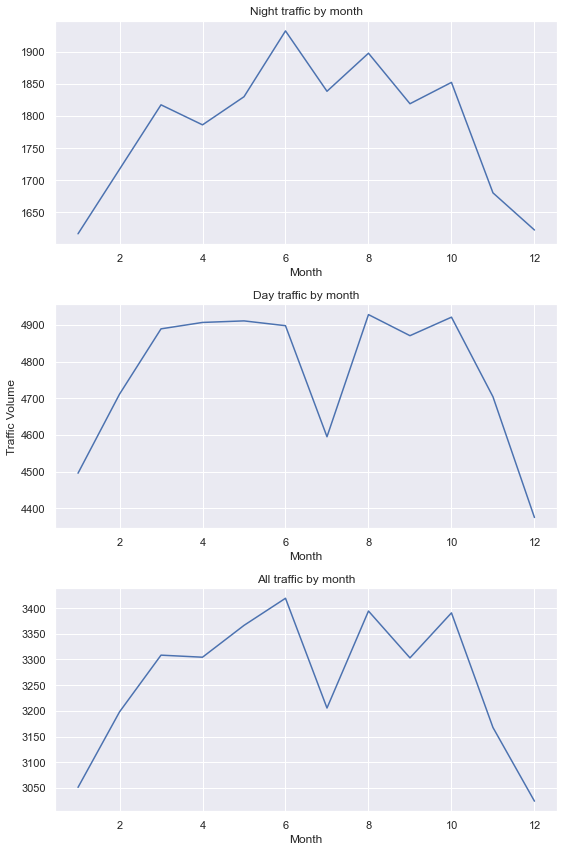

In [88]:
# plot via line
plt.figure(layout='tight', figsize=(8,12))
plt.subplot(3, 1, 1)
night_by_month['traffic_volume'].plot.line()
plt.title('Night traffic by month')
plt.xlabel('Month')
plt.subplot(3, 1, 2)
day_by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Day traffic by month')
plt.xlabel('Month')
plt.subplot(3, 1, 3)
traffic_volume_by_month['traffic_volume'].plot.line()
plt.title('All traffic by month')
plt.xlabel('Month')
plt.show()

### Traffic volume by month

All three graphs indicate the same patterns, granted at different traffic volume averages, show similar patterns. Traffic volume reduces in the colder months, November through January, and begins to rise again as the spring season approaches, February and March.

Traffic volume shows a significant drop in July before returning to levels similar to June in August.


In [89]:
# Time Indicators II, Day of the Week

# create new column 'dayofweek' to consist of the weekday, 0 is monday, 6 is sunday
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek

# aggregate into a new df, grouped by day of week and avg calc'ed
day_traffic_dayofweek = day_traffic.groupby('dayofweek').mean()
print('\n')
print('Day Traffic Volume by Day of Week')
print(day_traffic_dayofweek['traffic_volume'])

# repeat above for night traffic
night_traffic['dayofweek'] = night_traffic['date_time'].dt.dayofweek
night_traffic_dayofweek = night_traffic.groupby('dayofweek').mean()
print('\n')
print('Night Traffic Volume by Day of Week')
print(night_traffic_dayofweek['traffic_volume'])

# repeat above for all traffic
traffic_volume_copy['dayofweek'] = traffic_volume_copy['date_time'].dt.dayofweek
traffic_dayofweek = traffic_volume_copy.groupby('dayofweek').mean()



Day Traffic Volume by Day of Week
dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


Night Traffic Volume by Day of Week
dayofweek
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64


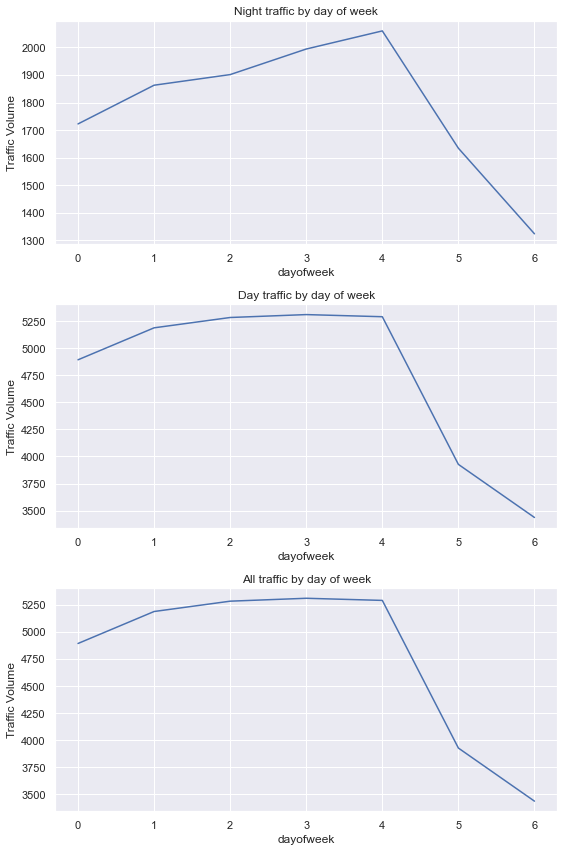

In [90]:
# plot via line
plt.figure(layout='tight', figsize=(8,12))
plt.subplot(3, 1, 1)
night_traffic_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Night traffic by day of week')
plt.subplot(3, 1, 2)
day_traffic_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Day traffic by day of week')
plt.subplot(3, 1, 3)
day_traffic_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('All traffic by day of week')
plt.show()

### Traffic volume by day of week

There is little to say of this. Traffic is heaviest during the weekdays (0 is Monday, 6 is Sunday), and it decreases with the weekend.

In [91]:
# Time Indicators III

# creating hour of the day column
day_traffic['hour'] = day_traffic['date_time'].dt.hour
night_traffic['hour'] = night_traffic['date_time'].dt.hour
traffic_volume_copy['hour'] = traffic_volume_copy['date_time'].dt.hour

# limit by week and weekend days
day_traffic_weekdays = day_traffic.copy()[day_traffic['dayofweek'] <= 4] # 4 == Friday
night_traffic_weekdays = night_traffic.copy()[night_traffic['dayofweek'] <= 4]
traffic_weekdays = traffic_volume_copy.copy()[traffic_volume_copy['dayofweek'] <= 4]

day_traffic_weekends = day_traffic.copy()[day_traffic['dayofweek'] >= 5] # 5 == Saturday
night_traffic_weekends = night_traffic.copy()[night_traffic['dayofweek'] >= 5]
traffic_weekends = traffic_volume_copy.copy()[traffic_volume_copy['dayofweek'] >= 5]

# grouped by hour and calc'ed avg: weekdays and weekends
day_traffic_hours_weekdays = day_traffic_weekdays.groupby('hour').mean()
night_traffic_hours_weekdays = night_traffic_weekdays.groupby('hour').mean()
traffic_hours_weekdays = traffic_weekdays.groupby('hour').mean()

day_traffic_hours_weekends = day_traffic_weekdays.groupby('hour').mean()
night_traffic_hours_weekends = night_traffic_weekends.groupby('hour').mean()
traffic_hours_weekends = traffic_weekdays.groupby('hour').mean()

print('\n')
print('Day Traffic Volume by Hour, Weekdays')
print(day_traffic_hours_weekdays['traffic_volume'])
print('Day Traffic Volume by Hour, Weekends')
print(day_traffic_hours_weekends['traffic_volume'])
print('\n')
print('Night Traffic Volume by Hour, Weekdays')
print(night_traffic_hours_weekdays['traffic_volume'])
print('Night Traffic Volume by Hour, Weekends')
print(night_traffic_hours_weekends['traffic_volume'])
print('\n')
print('Traffic Volume by Hour, Weekdays')
print(traffic_hours_weekdays['traffic_volume'])
print('Traffic Volume by Hour, Weekends')
print(traffic_hours_weekends['traffic_volume'])





Day Traffic Volume by Hour, Weekdays
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
Day Traffic Volume by Hour, Weekends
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Night Traffic Volume by Hour, Weekdays
hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
Night Traffic Volume by Hour, Weekends
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.

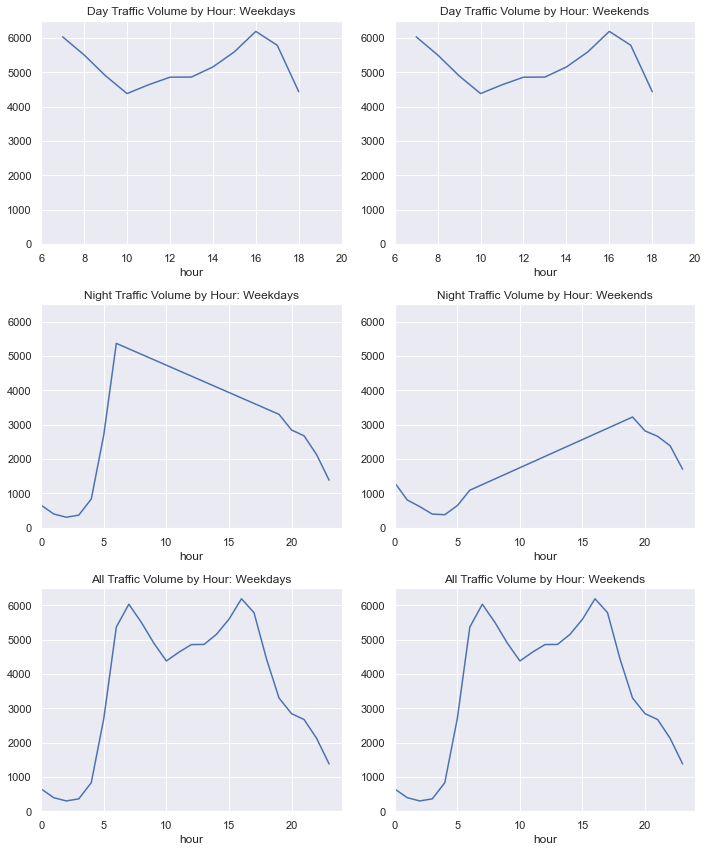

In [92]:
# plotting by weekday and weekend hours
plt.figure(figsize=(10,12), layout='tight')
plt.subplot(3,2,1)
day_traffic_hours_weekdays['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,6500)
plt.title('Day Traffic Volume by Hour: Weekdays')
plt.subplot(3,2,2)
day_traffic_hours_weekends['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,6500)
plt.title('Day Traffic Volume by Hour: Weekends')
plt.subplot(3,2,3)
night_traffic_hours_weekdays['traffic_volume'].plot.line()
plt.xlim(0,24)
plt.ylim(0,6500)
plt.title('Night Traffic Volume by Hour: Weekdays')
plt.subplot(3,2,4)
night_traffic_hours_weekends['traffic_volume'].plot.line()
plt.xlim(0,24)
plt.ylim(0,6500)
plt.title('Night Traffic Volume by Hour: Weekends')
plt.subplot(3,2,5)
traffic_hours_weekdays['traffic_volume'].plot.line()
plt.xlim(0,24)
plt.ylim(0,6500)
plt.title('All Traffic Volume by Hour: Weekdays')
plt.subplot(3,2,6)
traffic_hours_weekends['traffic_volume'].plot.line()
plt.xlim(0,24)
plt.ylim(0,6500)
plt.title('All Traffic Volume by Hour: Weekends')
plt.show()


### By weekend and weekday hour

The graphs generated using the entire dataset, "All Traffic Volume by Hour," show the clearest picture: traffic volume is at its peak during rush hours, ~6 a.m. to ~8 a.m. and ~4 p.m. to ~5 p.m.

A side note: I have not yet found a way to accurately depict a graph for the nighttime hours. As such, it shows erroneous data for the daytime hours.

In [93]:
# Weather Indicators

# Find corr between traffic_volume and weather columns
print('\n')
print('Correlation: All Traffic')
print(traffic_volume.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']])
print('\n')
print('Correlation: Day Traffic')
print(day_traffic.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']])
print('\n')
print('Correlation: Night Traffic')
print(night_traffic.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']])



Correlation: All Traffic
temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64


Correlation: Day Traffic
temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64


Correlation: Night Traffic
temp          0.094004
rain_1h      -0.012972
snow_1h      -0.007453
clouds_all    0.012832
Name: traffic_volume, dtype: float64


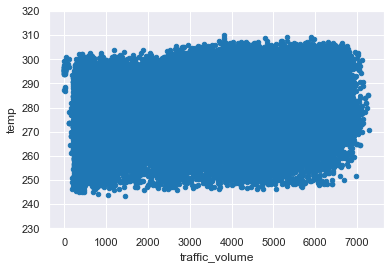

In [94]:
# plot scatter with column that has the strongest correlation
traffic_volume.plot.scatter('traffic_volume', 'temp', c='tab:blue') # returns error/warning when run without c para
plt.ylim(230,320) # errant 0K entries throw off the distribution
plt.show()

## Temperature offers no strong indicators

The above scatter plot shows no obvious patterns to indicate whether temperature indicates traffic volume.

In [95]:
# Weather Types

# looking over weather_main and weather_description
print('\n')
print('A look at weather_main column')
print(traffic_volume['weather_main'].value_counts())
print('\n')
print(traffic_volume['weather_main'].describe())
print('\n')
print(traffic_volume['weather_main'].info())
print('\n')

print('\n')
print('A look at weather_description column')
print(traffic_volume['weather_description'].value_counts())
print('\n')
print(traffic_volume['weather_description'].describe())
print('\n')
print(traffic_volume['weather_description'].info())
print('\n')





A look at weather_main column
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64


count      48204
unique        11
top       Clouds
freq       15164
Name: weather_main, dtype: object


<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: weather_main
Non-Null Count  Dtype 
--------------  ----- 
48204 non-null  object
dtypes: object(1)
memory usage: 376.7+ KB
None




A look at weather_description column
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow     

In [96]:
# grouping these together and aggregating via mean
day_weather_main = day_traffic.groupby('weather_main').mean()
day_weather_description = day_traffic.groupby('weather_description').mean()
night_weather_main = night_traffic.groupby('weather_main').mean()
night_weather_description = night_traffic.groupby('weather_description').mean()
by_weather_main = traffic_volume.groupby('weather_main').mean()
by_weather_description = traffic_volume.groupby('weather_description').mean()

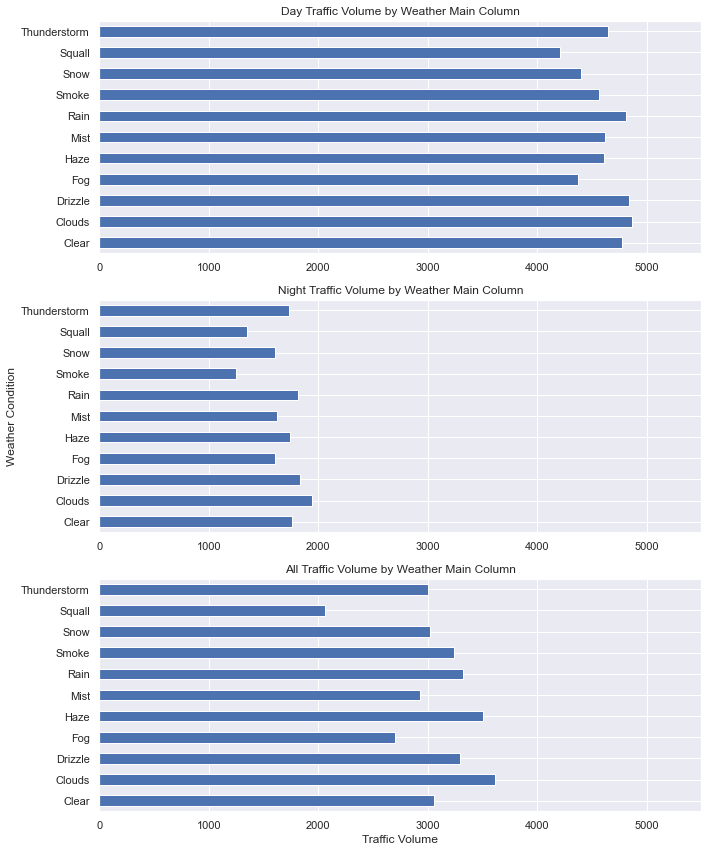

In [97]:
# blot horizontal bar for traffic_volume using weather_main aggregate
plt.figure(figsize=(10,12), layout='tight')
plt.subplot(3, 1, 1)
day_weather_main['traffic_volume'].plot.barh()
plt.title('Day Traffic Volume by Weather Main Column')
plt.ylabel('')
plt.xlim(0,5500)
plt.subplot(3, 1, 2)
night_weather_main['traffic_volume'].plot.barh()
plt.title('Night Traffic Volume by Weather Main Column')
plt.ylabel('Weather Condition')
plt.xlim(0,5500)
plt.subplot(3, 1, 3)
by_weather_main['traffic_volume'].plot.barh()
plt.title('All Traffic Volume by Weather Main Column')
plt.xlabel('Traffic Volume')
plt.xlim(0,5500)
plt.ylabel('')
plt.show()

### Looking at the main weather column

The column dubbed weather_main, a short textual description of the weather at the time of data collection, offers very few indicators of increased or heavy traffic volume. One could surmise that various mild conditions, such as "Clouds" and "Haze", would indicate little direct effect on traffic.

Various inclement conditions impact traffic volume; though, one might surmise this is due to drivers responding to these conditions by a) not driving or b) driving more cautiously during severe conditions, thus causing congestion.

That being said, none of these indicators are particularly strong.


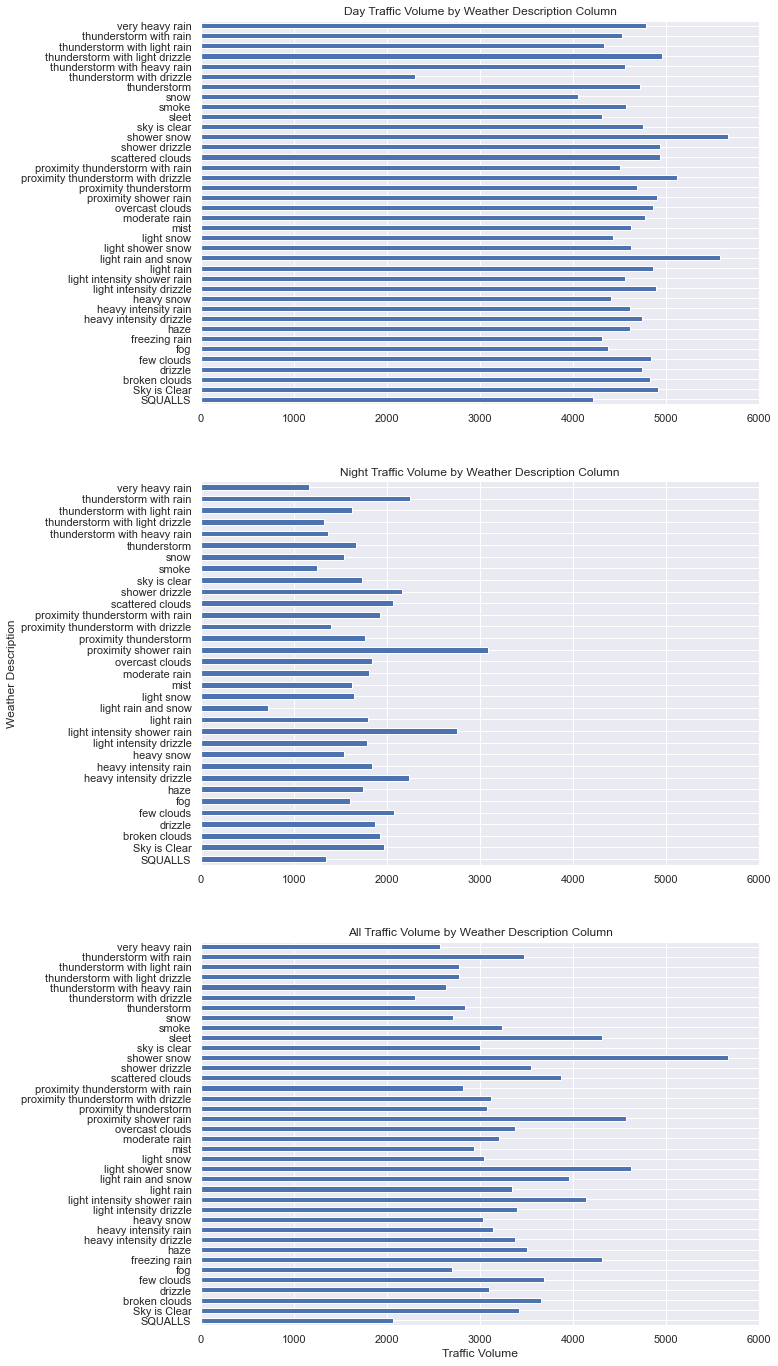

In [98]:
# blot horizontal bar for traffic_volume using weather_description aggregate
plt.figure(figsize=(10,24))
plt.subplot(3, 1, 1)
day_weather_description['traffic_volume'].plot.barh()
plt.title('Day Traffic Volume by Weather Description Column')
plt.ylabel('')
plt.xlim(0,6000)
plt.subplot(3, 1, 2)
night_weather_description['traffic_volume'].plot.barh()
plt.title('Night Traffic Volume by Weather Description Column')
plt.ylabel('Weather Description')
plt.xlim(0,6000)
plt.subplot(3, 1, 3)
by_weather_description['traffic_volume'].plot.barh()
plt.title('All Traffic Volume by Weather Description Column')
plt.xlabel('Traffic Volume')
plt.xlim(0,6000)
plt.ylabel('')
plt.show()

### Indictors in the Weather Description column
The weather description column, dubbed "weather_description," possesses strong indicators for heavy and light traffic. This column is composed of categorical, longer textual descriptions of weather at the time of recording.

#### Day Traffic
The Day Traffic graph shows that "light rain and snow" and "shower snow" descriptors indicate heavy traffic, likely due to congestion caused by cautious driving or possibly due to vehicle collisions. Both of these descriptors show traffic volume in excess of 5,000 vehicles.

A "thunderstorm with drizzle," however, indicates a reduction in traffic volume, well less than 3,000 vehicles.

#### Night Traffic
"Light intensity shower rain" and "proximity shower rain" are both indicators of heavy traffic during the night and early morning hours. These indicators show traffic volume at about 2,800 vehicles and 3,100 vehicles, respectively.

In contrast, "light rain and snow" is a strong indicator of light traffic during the night hours with less than 1,000 vehicles.

#### All Traffic
Taking all hours of the day into account, "shower snow" is the strongest indicator for heavy traffic, exceeding 5,000 vehicles.

Squalls, sudden and sharp increases in wind speed lasting minutes, and thunderstorms with drizzle both indicate reduced traffic volumes, less than 2,500 vehicles in both instances.